# Figure 3- V2 Do Not Sacrifice Performance for Speed


# Libraries


In [1]:
import utils as u
import config as c
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, friedmanchisquare, wilcoxon, ks_2samp
import statsmodels.stats.multitest as smm
from itertools import combinations
import statsmodels.formula.api as smf
import itertools

sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

# Data Load


In [22]:
tdf = u.load_trials_df()
tdf = u.compute_days_relative_to_stage(tdf, 5)
tdf = u.compute_days_relative_to_stage(tdf, 10)

Loading days data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


# A


In [124]:
probe_violation_df = tdf.query("stage in @c.PROBE_STAGES").groupby(["date", "fix_experiment", "animal_id", "stage", "days_relative_to_stage_10"]).violations.mean().reset_index()
probe_violation_df.rename(columns={"violations": "violation_rate"}, inplace=True)

stats = probe_violation_df.groupby('fix_experiment')['violation_rate'].agg(['median', 'mean', 'std', 'size'])
stats

plot_df = probe_violation_df.copy()

/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication/utils.py:221: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=None, frameon=False)


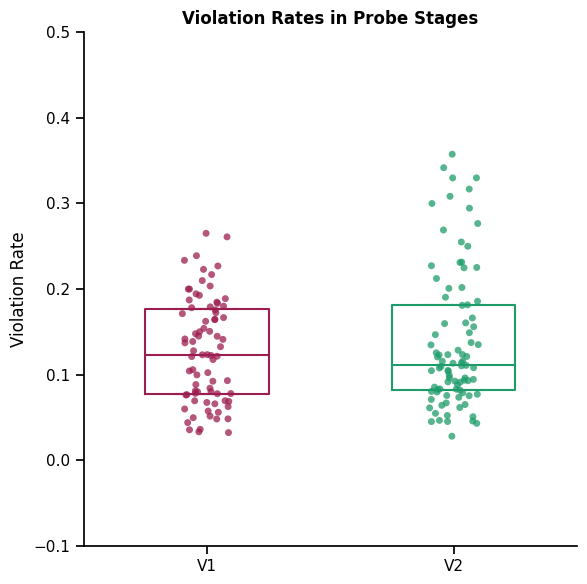

In [98]:
fig, ax = plt.subplots(figsize=(6,6))


u.box_strip_v1_vs_v2(plot_df, x="fix_experiment", order=c.HUE_ORDER_EXP, y="violation_rate", ax=ax, xlabel="", ylabel="Violation Rate", s=5)
ax.set_title("Violation Rates in Probe Stages", fontweight="bold")
plt.tight_layout()

ax.set(ylim=(-0.1, 0.5))

#save fig
fig.savefig("figures/V0_fig3a_probe_violation_rates.png", dpi=300, bbox_inches="tight")

In [19]:
u.compare_v1_v2(plot_df, "violation_rate")

,normality_V1,normality_V2,n_V1,n_V2,test_type,test_statistic,p_val_raw
0,False,False,79,89,mannwhitney,3440.5,0.812848


In [21]:
u.compare_v1_v2_multi_sample(plot_df, "violation_rate")

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


,test_type,test_statistic,p_val_raw,residuals_normal
0,mixedlm_random_intercept,0.37315,0.709037,False


# B


In [23]:
target_time_df = (
    tdf.query("has_reached_target_fixation == True")
    .groupby(["animal_id", "fix_experiment"], observed=True)[
        f"days_relative_to_stage_5"
    ]
    .min()
    .reset_index()
)

target_time_df.rename(
    columns={f"days_relative_to_stage_5": "days_to_target"},
    inplace=True,
)

target_time_df.head()


,animal_id,fix_experiment,days_to_target
0,R040,V1,13
1,R041,V2,11
2,R042,V1,12
3,R043,V2,6
4,R045,V2,11


In [26]:
probe_time_and_viol_df = pd.merge(probe_violation_df, target_time_df, on=["animal_id", "fix_experiment"], how="left")
probe_time_and_viol_df.head()


,date,fix_experiment,animal_id,stage,violation_rate,days_to_target
0,2024-08-07,V2,R043,9.0,0.146739,6
1,2024-08-08,V2,R043,9.0,0.105012,6
2,2024-08-09,V2,R043,9.0,0.081841,6
3,2024-08-10,V2,R043,9.0,0.045147,6
4,2024-08-11,V1,R042,9.0,0.194444,12


/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in

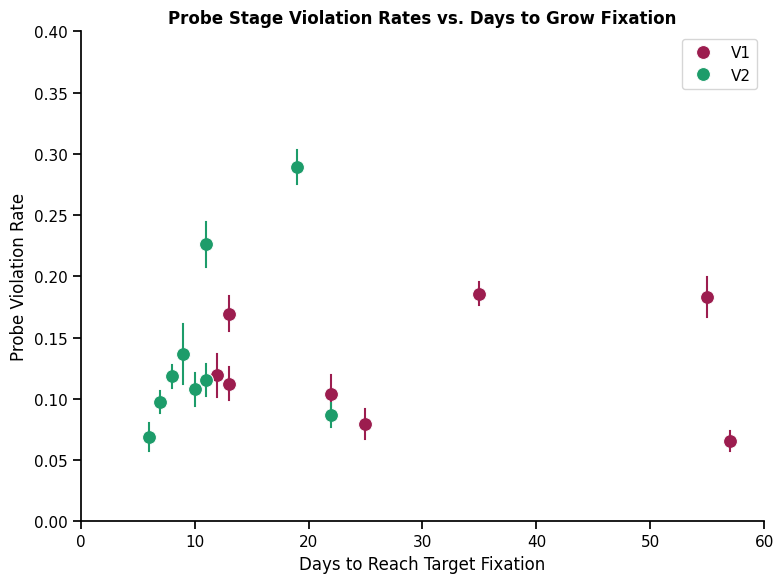

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(
    data=probe_time_and_viol_df,
    x="days_to_target",
    y="violation_rate",
    hue="fix_experiment",
    palette=c.EXP_PALETTE,
    hue_order=c.HUE_ORDER_EXP,
    marker="o",
    style="animal_id",
    markersize=10,  # Increase marker size
    linestyle="",
    err_style="bars",
    errorbar="se",
    ax=ax,
)

_ = ax.set(
    xlim=(0, 60),
    ylim=(0, 0.40),
    xlabel="Days to Reach Target Fixation",
    ylabel="Probe Violation Rate",
)

sns.despine()
ax.set_title("Probe Stage Violation Rates vs. Days to Grow Fixation", fontweight="bold")
plt.tight_layout()


ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:3], labels=labels[1:3])
plt.tight_layout()
fig.savefig("figures/V0_fig3b_probe_violation_rates_vs_days_to_target.png", dpi=300, bbox_inches="tight")

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in

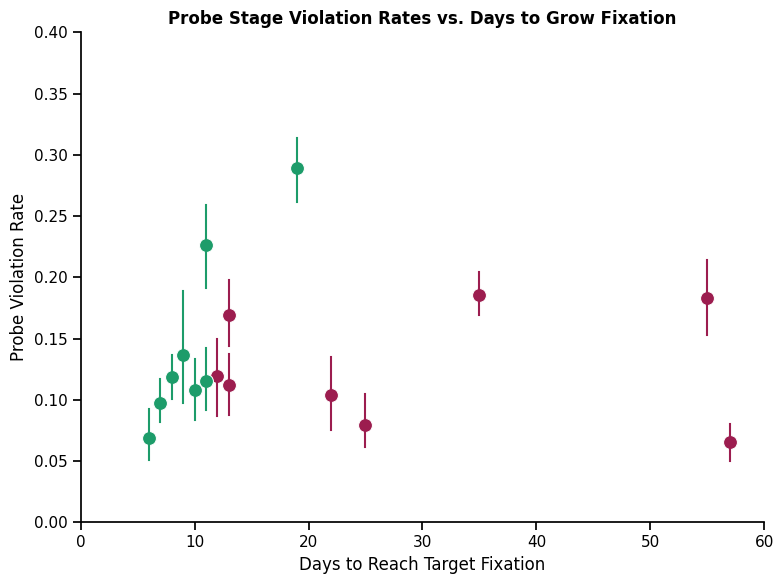

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(
    data=probe_time_and_viol_df.query("animal_id != 'R047'"),
    x="days_to_target",
    y="violation_rate",
    hue="fix_experiment",
    palette=c.EXP_PALETTE,
    hue_order=c.HUE_ORDER_EXP,
    marker="o",
    style="animal_id",
    markersize=10,  # Increase marker size
    linestyle="",
    err_style="bars",
    ax=ax,
)

_ = ax.set(
    xlim=(0, 60),
    ylim=(0, 0.40),
    xlabel="Days to Reach Target Fixation",
    ylabel="Probe Violation Rate",
)

sns.despine()
ax.set_title("Probe Stage Violation Rates vs. Days to Grow Fixation", fontweight="bold")
plt.tight_layout()


ax.get_legend().remove()

fig.savefig("figures/V0_fig3b_probe_violation_rates_vs_days_to_target.png", dpi=300, bbox_inches="tight")

In [41]:
# Random intercepts by animal_id
md = smf.mixedlm(
    formula="violation_rate ~ days_to_target * fix_experiment",
    data=probe_time_and_viol_df,
    groups=probe_time_and_viol_df["animal_id"]
)
mdf = md.fit(method='lbfgs')  # or 'nlopt' etc., whichever converges best
print(mdf.summary())

                    Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       violation_rate
No. Observations:       168           Method:                   REML          
No. Groups:             17            Scale:                    0.0020        
Min. group size:        9             Log-Likelihood:           243.1853      
Max. group size:        10            Converged:                Yes           
Mean group size:        9.9                                                   
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.126    0.043  2.913 0.004  0.041  0.210
fix_experiment[T.V2]                -0.047    0.066 -0.707 0.480 -0.177  0.083
days_to_target                       0.000    0.001  0.048 0.962 -0.002  

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [47]:
# Random intercepts by animal_id
md = smf.mixedlm(
    formula="violation_rate ~ days_to_target * fix_experiment",
    data=probe_time_and_viol_df.query("animal_id != 'R047'"),
    groups=probe_time_and_viol_df.query("animal_id != 'R047'")["animal_id"]
)
mdf = md.fit(method='lbfgs')  # or 'nlopt' etc., whichever converges best
print(mdf.summary())

                    Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       violation_rate
No. Observations:       158           Method:                   REML          
No. Groups:             16            Scale:                    0.0021        
Min. group size:        9             Log-Likelihood:           230.1610      
Max. group size:        10            Converged:                Yes           
Mean group size:        9.9                                                   
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.125    0.030  4.123 0.000  0.066  0.185
fix_experiment[T.V2]                -0.147    0.054 -2.728 0.006 -0.253 -0.041
days_to_target                       0.000    0.001  0.073 0.942 -0.002  

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Outlier Analysis


In [85]:
target_time_df.query("animal_id == 'R047'")

,animal_id,fix_experiment,days_to_target
6,R047,V2,22


In [86]:
probe_violation_df.query("animal_id == 'R047'").agg(
    #violation rate mean and sd
    violation_rate_mean=("violation_rate", "mean"),
    violation_rate_sd=("violation_rate", "std")
)

,violation_rate
violation_rate_mean,0.086980
violation_rate_sd,0.031265


In [83]:
pdf = u.load_poke_df()

outlier_df = pdf.query("animal_id == 'R047' and stage in @c.GROWING_STAGES")
outlier_df = u.compute_days_relative_to_stage(outlier_df.copy(), 5)

outlier_df.head()



Loading poke data from directory: /Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/fixation_publication


,sessid,animal_id,trial,cpoke_dur,cpoke_iti,post_settling_violation,settling_violation,was_rewarded,fixation_dur,date,stage,fix_experiment,relative_cpoke_dur,was_valid,cpoke_tit_timeout_adj,prev_was_valid,datetime_col,days_relative_to_stage_5
0,965079,R047,1,0.2574,0.0223,0,1,0,0.401,01-Aug-2024 14:29:00,5.0,V2,-0.1436,False,0.0223,None,2024-08-01 14:29:00,0
1,965079,R047,1,0.0880,0.1134,0,1,0,0.401,01-Aug-2024 14:29:00,5.0,V2,-0.3130,False,0.1134,False,2024-08-01 14:29:00,0
2,965079,R047,1,0.0164,0.1020,0,1,0,0.401,01-Aug-2024 14:29:00,5.0,V2,-0.3846,False,0.1020,False,2024-08-01 14:29:00,0
3,965079,R047,1,0.0579,108.2671,0,1,0,0.401,01-Aug-2024 14:29:00,5.0,V2,-0.3431,False,108.2671,False,2024-08-01 14:29:00,0
4,965079,R047,1,0.0320,29.9668,0,1,0,0.401,01-Aug-2024 14:29:00,5.0,V2,-0.3690,False,29.9668,False,2024-08-01 14:29:00,0


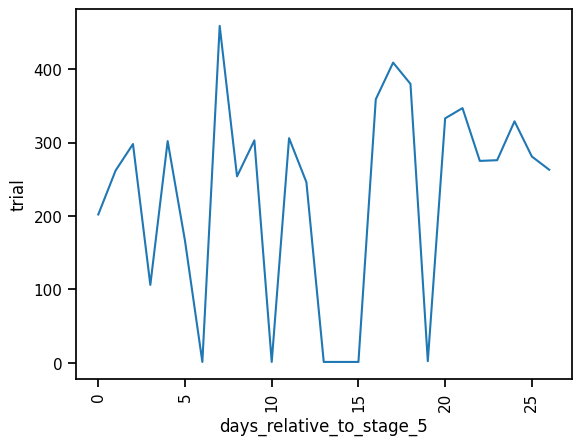

In [84]:
max_trials = outlier_df.groupby("days_relative_to_stage_5").trial.max().reset_index()
sns.lineplot(max_trials, x="days_relative_to_stage_5", y="trial")
_ = plt.xticks(rotation=90)


In [69]:
max_trials = outlier_df.groupby("date").trial.max().reset_index()
dates_with_max_trials_less_than_20 = max_trials[max_trials["trial"] < 20]["date"]
print(dates_with_max_trials_less_than_20)

6     07-Aug-2024 15:03:56
10    11-Aug-2024 14:00:55
13    14-Aug-2024 14:23:33
14    15-Aug-2024 14:21:29
15    16-Aug-2024 14:27:07
19    20-Aug-2024 14:17:12
Name: date, dtype: object


In [76]:
low_trial_pdf = outlier_df.query("date in @dates_with_max_trials_less_than_20")
low_trial_pdf.groupby("date").size()

date
07-Aug-2024 15:03:56     10
11-Aug-2024 14:00:55     23
14-Aug-2024 14:23:33     16
15-Aug-2024 14:21:29      6
16-Aug-2024 14:27:07    141
20-Aug-2024 14:17:12     18
dtype: int64

# S4


In [94]:
stats = probe_violation_df.groupby(['fix_experiment', 'stage'])['violation_rate'].agg(['median', 'mean', 'std', 'size']).reset_index()


plot_df = probe_violation_df.copy()
stats

,fix_experiment,stage,median,mean,std,size
0,V1,9.0,0.162319,0.155763,0.053288,39
1,V1,10.0,0.079043,0.101142,0.055363,40
2,V2,9.0,0.124491,0.156001,0.082825,44
3,V2,10.0,0.092949,0.121863,0.077304,45


/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_60125/3941671005.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Stable\nDelay", "Random\nDelay"])


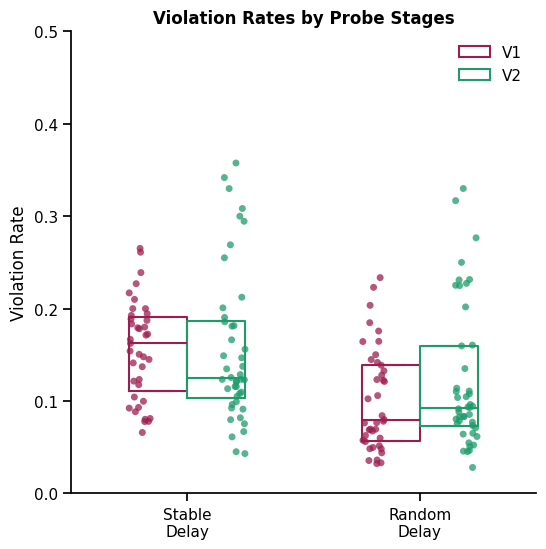

In [116]:
fig, ax = plt.subplots(figsize=(6,6))

u.box_strip_v1_vs_v2(plot_df, x="stage", order=None, y="violation_rate", ax=ax, xlabel="", ylabel="Violation Rate")

ax.set_title("Violation Rates by Probe Stages", fontweight="bold")
ax.set_ylim(0, 0.5)
ax.set_xticklabels(["Stable\nDelay", "Random\nDelay"])


#save fig
fig.savefig("figures/V0_figs4a_violation_rates_by_probe_stage.png", dpi=300, bbox_inches="tight")

In [ ]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn 

# 1) Create a new column identifying each group
probe_violation_df['group'] = probe_violation_df['fix_experiment'].astype(str) \
                              + "_stage_" \
                              + probe_violation_df['stage'].astype(str)

# 2) Extract the data for each group
groups = []
unique_groups = probe_violation_df['group'].unique()
for g in unique_groups:
    groups.append(probe_violation_df.loc[probe_violation_df['group'] == g, 'violation_rate'].values)

# 3) Omnibus test (Kruskal–Wallis)
H, p_omnibus = kruskal(*groups)
print("Kruskal–Wallis H statistic:", H)
print("Omnibus p-value:", p_omnibus)

# 4) If p_omnibus < 0.05, proceed with post hoc Dunn’s test
posthoc_results = posthoc_dunn(probe_violation_df, val_col='violation_rate',
                                  group_col='group', p_adjust='holm')
posthoc_results

Kruskal–Wallis H statistic: 22.73998789558127
Omnibus p-value: 4.5749122540650673e-05


,V1_stage_10.0,V1_stage_9.0,V2_stage_10.0,V2_stage_9.0
V1_stage_10.0,1.000000,0.000259,0.557402,0.002845
V1_stage_9.0,0.000259,1.000000,0.006971,0.557402
V2_stage_10.0,0.557402,0.006971,1.000000,0.043998
V2_stage_9.0,0.002845,0.557402,0.043998,1.000000


# B


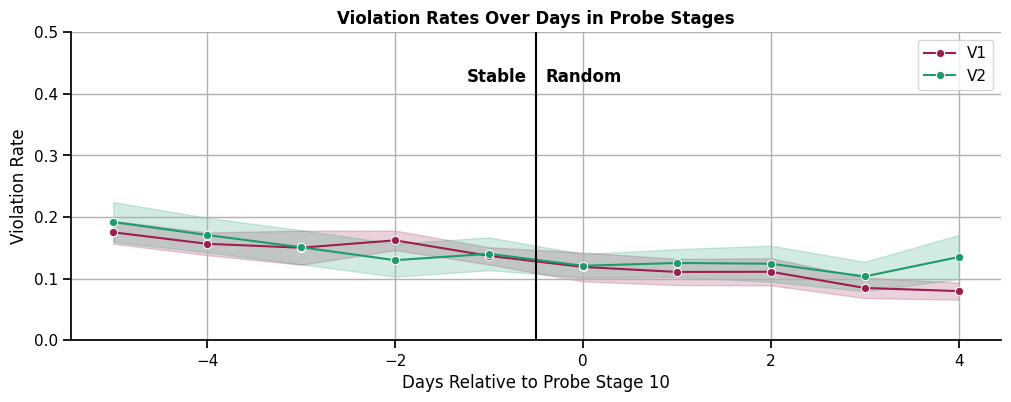

In [137]:
fig, ax = plt.subplots(figsize=(12,4))

sns.despine()

sns.lineplot(data=probe_violation_df, x="days_relative_to_stage_10", y="violation_rate", hue="fix_experiment", hue_order=c.HUE_ORDER_EXP, palette=c.EXP_PALETTE, marker="o", errorbar="se")
ax.set_ylim(0, 0.5)
ax.axvline(-0.5, color="black")
_ = ax.text(-0.4, 0.42, "Random", horizontalalignment="left", fontweight="bold")
_ = ax.text(-0.6, 0.42, "Stable", horizontalalignment="right", fontweight="bold")
ax.grid()

_ = ax.set(xlabel="Days Relative to Probe Stage 10", ylabel="Violation Rate")
ax.set_title("Violation Rates Over Days in Probe Stages", fontweight="bold")

ax.legend(title="")

fig.savefig("figures/V0_figs4b_violation_rates_by_days_relative_to_probe_stage_10.png", dpi=300, bbox_inches="tight")

